# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

Data pekerjaan di indonesia pada  https://www.kalibrr.id/job-board/te/data/1)

The reason for conducting this project is to identify regions or areas in Indonesia that have the most job openings. The results can provide insights and useful information for those interested in job searching or recruitment in specific regions or areas. The analysis findings can also serve as a basis for decision-making in directing recruitment efforts or identifying potential job markets in the regions or areas identified as having the highest job openings

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [2]:
# import request to fetch data with requests.get from the Kalibrr website
url_get = requests.get('https://www.kalibrr.id/job-board/te/data/1')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
# Viewing the HTML code of the URL that we have retrieved/scraped

url_get.content[1:500]

b'!DOCTYPE html><html lang="en"><head><meta name="viewport" content="width=device-width"/><meta charSet="utf-8"/><script type="application/ld+json">{\n    "@context": "https://schema.org",\n    "@type": "WebSite",\n    "url": "https://www.kalibrr.com",\n    "potentialAction": [\n      {\n        "@type": "SearchAction",\n        "target": "https://www.kalibrr.com/job-board/te/={search_term_string}",\n        "query-input": "required name=search_term_string"\n      }\n     ]\n  }</script><meta property="og:i'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [5]:
# erforming the parsing process (the process of breaking down unstructured data into a structured form that can be accessed and processed by a computer program)

# Importing BeautifulSoup to perform web scraping / data retrieval from a requested web page 
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

### Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [6]:
# Storing the information retrieved from 'data/table' on the web into a variable named 'table

table = soup.find('div', attrs={'class':'k-border-b k-border-t k-border-tertiary-ghost-color md:k-border md:k-overflow-hidden md:k-rounded-lg'})

# prettify --To display the HTML code in a more formatted and visually appealing way--
print(table.prettify()[1:500])

div class="k-border-b k-border-t k-border-tertiary-ghost-color md:k-border md:k-overflow-hidden md:k-rounded-lg">
 <div class="k-bg-white k-divide-y k-divide-solid k-divide-tertiary-ghost-color" itemscope="" itemtype="http://schema.org/ItemList">
  <style data-emotion="css 1b4vug6">
   .css-1b4vug6{grid-template-columns:5rem 1rem auto 1rem max-content;grid-template-rows:auto 0.25rem auto;}
  </style>
  <div class="k-grid k-border-tertiary-ghost-color k-text-sm k-p-4 md:k-p-6 css-1b4vug6" itempr


Finding row length.

In [7]:
# Before looping
# Calculating the length of a list using len
# To aid the looping process, we need to determine the length of the data we have 
row_title = table.find_all('div', attrs={'class':'k-col-start-3 k-row-start-1'})
row_length_title = len(row_title)

row_lokasi = table.find_all('div', attrs={'class':'k-flex k-flex-col md:k-flex-row'})
row_length_lokasi = len(row_lokasi)

row_tdl = table.find_all('span', attrs={'class':'k-block k-mb-1'})
row_length_tdl = len(row_tdl)

row_company = table.find_all('span', attrs={'class':'k-inline-flex k-items-center k-mb-1'})
row_length_company = len(row_company)

print(row_length_title, row_length_lokasi, row_length_tdl, row_length_company)

15 15 15 15


Do the scrapping process here (please change this markdown with your explanation)

In [8]:
temp = [] #initiating a tuple --Creating an empty list to store the results of the upcoming loop--

for i in range(0, row_length_title):
    
    # Using find_all to extract data for title, company, location, and tp_dl.
    # Now the code automatically inserts the data based on i starting from 0 with a loop that runs for row_length, which is 51
    Title2 = table.find_all('div', attrs={'class':'k-col-start-3 k-row-start-1'})[i].text
    
    Company2 = table.find_all('span', attrs={'class':'k-inline-flex k-items-center k-mb-1'})[i].text
    
    Lokasi2 = table.find_all('div', attrs={'class':'k-flex k-flex-col md:k-flex-row'})[i].text
    
    TP_DL2 = table.find_all('span', attrs={'class':'k-block k-mb-1'})[i].text
    
 
    temp.append((Title2, Company2, Lokasi2, TP_DL2))
    #scrapping process
    
temp

[('Project Manager',
  'PGI Data',
  'Jakarta, Indonesia',
  'Posted 10 days ago • Apply before 29 Jun'),
 ('IT System Analyst',
  'PGI Data',
  'Jakarta, Indonesia',
  'Posted 17 days ago • Apply before 19 Apr'),
 ('DevOps and Data Engineer',
  'Mobius Digital',
  'Tangerang Selatan, Indonesia',
  'Posted 8 days ago • Apply before 13 May'),
 ('Data Analytics Manager',
  'PT Adicipta Inovasi Teknologi',
  'Kota Jakarta Barat, Indonesia',
  'Posted 7 days ago • Apply before 29 Apr'),
 ('Senior Data Engineer',
  'paper.id',
  'North Jakarta, Indonesia',
  'Posted 11 hours ago • Apply before 30 May'),
 ('Network  Security Engineer',
  'PGI Data',
  'Jakarta, Indonesia',
  'Posted 7 days ago • Apply before 19 Apr'),
 ('Data Quality Analyst',
  'Astra Financial',
  'Central Jakarta City, Indonesia',
  'Posted 10 days ago • Apply before 1 May'),
 ('Data Scientist',
  'Mobius Digital',
  'Tangerang Selatan, Indonesia',
  'Posted a month ago • Apply before 15 May'),
 ('Data Entry',
  'PT. Roya

## Creating data frame & Data wrangling

Put the array into dataframe

In [9]:
# Creating a dataframe from the results of the loop using pandas

import pandas as pd

df = pd.DataFrame(temp, columns = ('Titles', 'Companys', 'Lokasis', 'TP_DLs'))
df.head()

,Titles,Companys,Lokasis,TP_DLs
0,Project Manager,PGI Data,"Jakarta, Indonesia",Posted 10 days ago • Apply before 29 Jun
1,IT System Analyst,PGI Data,"Jakarta, Indonesia",Posted 17 days ago • Apply before 19 Apr
2,DevOps and Data Engineer,Mobius Digital,"Tangerang Selatan, Indonesia",Posted 8 days ago • Apply before 13 May
3,Data Analytics Manager,PT Adicipta Inovasi Teknologi,"Kota Jakarta Barat, Indonesia",Posted 7 days ago • Apply before 29 Apr
4,Senior Data Engineer,paper.id,"North Jakarta, Indonesia",Posted 11 hours ago • Apply before 30 May


---------------------

### The method used above requires a lot of time to retrieve data from different pages on the website, as it involves repeatedly creating new variables for tables and rows, and performing looping multiple times

### For that reason, I am using a loop to retrieve data from 15 different pages ###

1. ***Finding the right key to scrap the data  & Extracting the right information (5 points)***

In [10]:
import time # Importing time to introduce delays during data retrieval from each page

temp_new = [] # tuple --To store the final output data--

# Performing a loop for the first 15 pages
for page_num in range(1, 16):
    
    # Sending a GET request to the website and parsing the HTML content
    url = f'https://www.kalibrr.id/id-ID/job-board/te/data/{page_num}'
    response = requests.get(url)
    soup2 = BeautifulSoup(response.content, 'html.parser')

    # Finding 15 div elements with the class 'class-div' on the page
    Title = soup2.find_all('div', {'class': 'k-col-start-3 k-row-start-1'})[:15]
    
    # Finding 15 span elements with the class 'class-span' on the page
    Company = soup2.find_all('span', {'class': 'k-inline-flex k-items-center k-mb-1'})[:15]
    
      # Finding 15 span elements with the class 'class-div' on the page
    Lokasi = soup2.find_all('div', {'class': 'k-flex k-flex-col md:k-flex-row'})[:15]
    
      # Finding 15 span elements with the class 'class-span' on the page
    Date_work_and_submit = soup2.find_all('span', {'class': 'k-block k-mb-1'})[:15]

    # Displaying the text from the 15 div elements found on the page
    for div_element in Title:
        print(div_element.text.strip())

    # Displaying the text from the 15 span elements found on the page
    for span_element in Company:
        print(span_element.text.strip())
        
        # Displaying the text from the 15 span elements found on the page
    for div_element2 in Lokasi:
        print(div_element2.text.strip())
        
        # Displaying the text from the 15 span elements found on the page
    for span_element2 in Date_work_and_submit:
        print(span_element2.text.strip())

    # Adding a 1-second delay before proceeding to the next page
    time.sleep(1)
    
    # Automatically adding the data obtained from looping to their respective variables using append
    temp_new.append((Title, Company, Lokasi, Date_work_and_submit)) 

# Adding 'len' to prevent the HTML code from being displayed after the looping is completed
print(len(temp_new))

Project Manager
IT System Analyst
Data Analytics Manager
Senior Data Engineer
DevOps and Data Engineer
Network  Security Engineer
Data Quality Analyst
Data Scientist
Data Entry
IOS & Android Developer
Data Analyst
Moderation Trainers
Quality Assurance
Android Developer
Senior Data Analyst
PGI Data
PGI Data
PT Adicipta Inovasi Teknologi
paper.id
Mobius Digital
PGI Data
Astra Financial
Mobius Digital
PT. Royal Trust
PT Adi Data Informatika
OONA Insurance Indonesia
Gear Inc
Gear Inc
PhinCon
paper.id
Jakarta, Indonesia
Jakarta, Indonesia
Kota Jakarta Barat, Indonesia
North Jakarta, Indonesia
Tangerang Selatan, Indonesia
Jakarta, Indonesia
Central Jakarta City, Indonesia
Tangerang Selatan, Indonesia
South Jakarta, Indonesia · Rp 4.000.000,00 - Rp 5.000.000,00  / bulan
Jakarta Barat, Indonesia
Jakarta Selatan, Indonesia
Denpasar, Indonesia
Denpasar, Indonesia
Jakarta Selatan, Indonesia
North Jakarta, Indonesia
Posted 10 days ago • Apply before 29 Jun
Posted 17 days ago • Apply before 19 Apr


### After performing the above web scraping loop, the next step is to extract the data first. Then, combine the four variable lists that have been created into one data

The extraction process is necessary to retrieve information from the desired web page and store it in a format that is easier to process and analyze. In the above code, information such as job title, company name, location, posting date, and job deadline can be extracted from the web page using BeautifulSoup and stored as tuples in the temp_new variable. Afterwards, the temp_new variable is used to transform the data format into a list of tuples in the data variable, which will be easier to process and analyze. In this case, each element in the list of tuples consists of four elements representing the job title, company name, location, posting date, and deadline.

1. **Extracting the text for job title (title_new), company name (companies_new), location (location_new), and date (DateWorkSubmit_new) from the elements indicated by indexes 0, 1, 2, and 3 of the variable page_data, respectively, using the text.strip() function.**

2. **Adding the contents of the newly formed list to the variable "data" using the list addition operator (+=).**

3. **Combining the four lists that have just been generated (title_new, companies_new, location_new, and DateWorkSubmit_new) into a single list using the list(zip()) function.**

In [11]:
# Extracting data from the "temp_new" variable.

data = []
for page_data in temp_new:
    
    #1 Extracting the lists that have been created in the previous loop into text information.
    title_new = [Title.text.strip() for Title in page_data[0]]
    companies_new = [Company.text.strip() for Company in page_data[1]]
    location_new = [Lokasi.text.strip() for Lokasi in page_data[2]]
    DateWorkSubmit_new = [Date_work_and_submit.text.strip() for Date_work_and_submit in page_data[3]]
    
    #2 Adding the newly created list using the list addition operator (+=) and combining them with list(zip()).
    data += list(zip(title_new, companies_new, location_new, DateWorkSubmit_new))

------------

### After completing the data extraction process, I created a dataframe based on the "data" variable that I have created, and performed data wrangling tasks

2. ***Creating data frame & Data wrangling (5 points)***

In [12]:
# create a dataframe from data

df_new = pd.DataFrame(data, columns=['Title', 'Company', 'Lokasi', 'Date_work_and_submit'])

In [11]:
df_new

,Title,Company,Lokasi,Date_work_and_submit
0,Project Manager,PGI Data,"Jakarta, Indonesia",Posted 8 days ago • Apply before 29 Jun
1,IT System Analyst,PGI Data,"Jakarta, Indonesia",Posted 15 days ago • Apply before 19 Apr
2,Data Analytics Manager,PT Adicipta Inovasi Teknologi,"Kota Jakarta Barat, Indonesia",Posted 6 days ago • Apply before 29 Apr
3,DevOps and Data Engineer,Mobius Digital,"Tangerang Selatan, Indonesia",Posted 7 days ago • Apply before 13 May
4,Network Security Engineer,PGI Data,"Jakarta, Indonesia",Posted 6 days ago • Apply before 19 Apr
...,...,...,...,...
220,Quality Assurance Tester,PT Adi Data Informatika,"Jakarta Barat, Indonesia",Posted 3 months ago • Apply before 30 Jul
221,Account Executive,Compas.co.id,"Jakarta Pusat, Indonesia",Posted 2 months ago • Apply before 29 Apr
222,DevOps Engineer,Dans Multi Pro,"South Jakarta, Indonesia",Posted 6 months ago • Apply before 9 Sep
223,Temporary Tax staff,Giordano Indonesia,"North Jakarta, Indonesia",Posted 12 days ago • Apply before 12 Apr


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [13]:
# can check the data types(The df.dtypes attribute returns a Series object that shows the data types of each column in the dataframe. You can use this information to understand the data types of your columns and perform any necessary data type conversions or data wrangling operations accordingly.)

df_new.dtypes

Title                   object
Company                 object
Lokasi                  object
Date_work_and_submit    object
dtype: object

In [15]:
# Viewing the number of unique values in the 'company' column
# (The nunique() method returns the count of unique values in a column. In this example, it will give you the number of unique companies in the "company" column of your dataframe.)
df_new['Company'].nunique()

92

In [16]:
# I decided to change the data type of the 'company' column to 'category' because some companies have posted job roles under different titles.

df_new['Company'] = df_new['Company'].astype("category")

In [17]:
# To identify any anomalies in the data, I checked the number of unique values in the 'location' column
df_new['Lokasi'].unique()

array(['Jakarta, Indonesia', 'Kota Jakarta Barat, Indonesia',
       'North Jakarta, Indonesia', 'Tangerang Selatan, Indonesia',
       'Central Jakarta City, Indonesia',
       'South Jakarta, Indonesia\u2004·\u2004Rp\xa04.000.000,00 - Rp\xa05.000.000,00  / bulan',
       'Jakarta Barat, Indonesia', 'Jakarta Selatan, Indonesia',
       'Denpasar, Indonesia',
       'Jakarta Selatan, Indonesia\u2004·\u2004Rp\xa07.000.000,00 - Rp\xa015.000.000,00  / bulan',
       'South Tangerang, Indonesia', 'Tangerang, Indonesia',
       'West Jakarta, Indonesia', 'South Jakarta, Indonesia',
       'Jakarta Utara, Indonesia\u2004·\u2004Rp\xa03.500.000,00 - Rp\xa020.000.000,00  / bulan',
       'Jakarta Pusat, Indonesia', 'Kota Jakarta Selatan, Indonesia',
       'Jakarta Pusat, Indonesia\u2004·\u2004Rp\xa010.000.000,00 - Rp\xa020.000.000,00  / bulan',
       'Jakarta, Indonesia\u2004·\u2004Rp\xa072.000.000,00 - Rp\xa078.000.000,00  / tahun',
       'South Tangerang, Indonesia\u2004·\u2004Rp\xa06.000.

In [18]:
# After identifying the anomalies, I split the strings in the 'location' column using the desired separator (' · ').
# Then, I selected the first sub-string from the resulting split using [0]

df_new['Kota'] = df_new['Lokasi'].str.split(' · ').str[0]

In [17]:
df_new.head()

,Title,Company,Lokasi,Date_work_and_submit,Kota
0,Project Manager,PGI Data,"Jakarta, Indonesia",Posted 8 days ago • Apply before 29 Jun,"Jakarta, Indonesia"
1,IT System Analyst,PGI Data,"Jakarta, Indonesia",Posted 15 days ago • Apply before 19 Apr,"Jakarta, Indonesia"
2,Data Analytics Manager,PT Adicipta Inovasi Teknologi,"Kota Jakarta Barat, Indonesia",Posted 6 days ago • Apply before 29 Apr,"Kota Jakarta Barat, Indonesia"
3,DevOps and Data Engineer,Mobius Digital,"Tangerang Selatan, Indonesia",Posted 7 days ago • Apply before 13 May,"Tangerang Selatan, Indonesia"
4,Network Security Engineer,PGI Data,"Jakarta, Indonesia",Posted 6 days ago • Apply before 19 Apr,"Jakarta, Indonesia"


In [19]:
# I performed a drop operation on the 'location' column, as the 'location' column has been cleaned, and replaced it with the 'city' column
df_new = df_new.drop('Lokasi', axis=1)

In [20]:
df_new.head()

,Title,Company,Date_work_and_submit,Kota
0,Project Manager,PGI Data,Posted 10 days ago • Apply before 29 Jun,"Jakarta, Indonesia"
1,IT System Analyst,PGI Data,Posted 17 days ago • Apply before 19 Apr,"Jakarta, Indonesia"
2,Data Analytics Manager,PT Adicipta Inovasi Teknologi,Posted 7 days ago • Apply before 29 Apr,"Kota Jakarta Barat, Indonesia"
3,Senior Data Engineer,paper.id,Posted 12 hours ago • Apply before 30 May,"North Jakarta, Indonesia"
4,DevOps and Data Engineer,Mobius Digital,Posted 8 days ago • Apply before 13 May,"Tangerang Selatan, Indonesia"


In [21]:
df_new['Date_work_and_submit'].unique()

array(['Posted 10 days ago • Apply before 29 Jun',
       'Posted 17 days ago • Apply before 19 Apr',
       'Posted 7 days ago • Apply before 29 Apr',
       'Posted 12 hours ago • Apply before 30 May',
       'Posted 8 days ago • Apply before 13 May',
       'Posted 7 days ago • Apply before 19 Apr',
       'Posted 10 days ago • Apply before 1 May',
       'Posted a month ago • Apply before 15 May',
       'Posted 13 days ago • Apply before 30 May',
       'Posted 12 hours ago • Apply before 10 Jun',
       'Posted 10 hours ago • Apply before 30 May',
       'Posted 7 days ago • Apply before 18 Apr',
       'Posted a day ago • Apply before 30 May',
       'Posted a month ago • Apply before 30 May',
       'Posted a month ago • Apply before 29 Apr',
       'Posted a month ago • Apply before 30 Apr',
       'Posted 20 days ago • Apply before 27 May',
       'Posted 13 days ago • Apply before 19 May',
       'Posted 16 days ago • Apply before 26 Apr',
       'Posted a month ago • Apply 

In [22]:
# I separated the job posting date and job submission deadline date.
df_new['Date_work_post'] = df_new['Date_work_and_submit'].str.split(' • ').str[0]
df_new['Deadline_work_submit'] = df_new['Date_work_and_submit'].str.split(' • ').str[1]

In [23]:
# I dropped the 'Date_work_and_submit' column, as it has been separated, and replaced it with 2 new columns
df_new = df_new.drop('Date_work_and_submit', axis=1)

In [24]:
df_new.head()

,Title,Company,Kota,Date_work_post,Deadline_work_submit
0,Project Manager,PGI Data,"Jakarta, Indonesia",Posted 10 days ago,Apply before 29 Jun
1,IT System Analyst,PGI Data,"Jakarta, Indonesia",Posted 17 days ago,Apply before 19 Apr
2,Data Analytics Manager,PT Adicipta Inovasi Teknologi,"Kota Jakarta Barat, Indonesia",Posted 7 days ago,Apply before 29 Apr
3,Senior Data Engineer,paper.id,"North Jakarta, Indonesia",Posted 12 hours ago,Apply before 30 May
4,DevOps and Data Engineer,Mobius Digital,"Tangerang Selatan, Indonesia",Posted 8 days ago,Apply before 13 May


In [25]:
df_new.dtypes

Title                     object
Company                 category
Kota                      object
Date_work_post            object
Deadline_work_submit      object
dtype: object

In [26]:
df_new['Date_work_post'].nunique()

30

In [27]:
df_new['Date_work_post'] = df_new['Date_work_post'].astype('category')

In [28]:
df_new['Deadline_work_submit'].nunique()

68

In [29]:
df_new['Deadline_work_submit'] = df_new['Deadline_work_submit'].astype('category')

In [30]:
df_new['Kota'].nunique()

36

In [31]:
df_new['Kota'] = df_new['Kota'].astype('category')

In [32]:
df_new['Title'].nunique()

162

------

### To implement the web scraping code into a Flask dashboard

3. ***Implement it on flask dashboard (2 points)***

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

-----------

## Performing analysis and drawing conclusions from the visualizations that I have created

4. ***Creating a tidy python notebook as a report (2 points)***

First you can do start with making the data visualisation. 

In [66]:
df_new.head()

,Title,Company,Kota,Date_work_post,Deadline_work_submit
0,Project Manager,PGI Data,"Jakarta, Indonesia",Posted 10 days ago,Apply before 29 Jun
1,IT System Analyst,PGI Data,"Jakarta, Indonesia",Posted 17 days ago,Apply before 19 Apr
2,Data Analytics Manager,PT Adicipta Inovasi Teknologi,"Kota Jakarta Barat, Indonesia",Posted 7 days ago,Apply before 29 Apr
3,Senior Data Engineer,paper.id,"North Jakarta, Indonesia",Posted 12 hours ago,Apply before 30 May
4,DevOps and Data Engineer,Mobius Digital,"Tangerang Selatan, Indonesia",Posted 8 days ago,Apply before 13 May


***Next, I create a bar plot visualization of job counts based on location to facilitate gaining insights***

In [67]:
# Importing Matplotlib for visualization

import matplotlib.pyplot as plt

In [68]:
# Creating a variable 'job_counts' to retrieve data based on the objective, which is to create a plot of job counts based on location.

job_counts = df_new.groupby('Kota')['Title'].count().sort_values(ascending=False)

In [69]:
job_counts

Kota
South Jakarta, Indonesia           31
Tangerang, Indonesia               25
Jakarta, Indonesia                 19
Jakarta Selatan, Indonesia         18
Central Jakarta, Indonesia         16
Kota Jakarta Selatan, Indonesia    12
North Jakarta, Indonesia           11
Jakarta Pusat, Indonesia           11
Jakarta Barat, Indonesia           10
Surabaya, Indonesia                 8
South Tangerang, Indonesia          6
Jakarta Timur, Indonesia            5
West Jakarta, Indonesia             5
Central Jakarta City, Indonesia     4
Tangerang Selatan, Indonesia        4
Kota Jakarta Barat, Indonesia       4
Bandung Kota, Indonesia             4
Sleman, Indonesia                   3
Makassar, Indonesia                 3
Tangerang Kabupaten, Indonesia      2
Tangerang Kota, Indonesia           2
Bandung Kabupaten, Indonesia        2
Malang Kota, Indonesia              2
Jakarta Utara, Indonesia            2
East Jakarta, Indonesia             2
Denpasar, Indonesia                 2
Bogor K

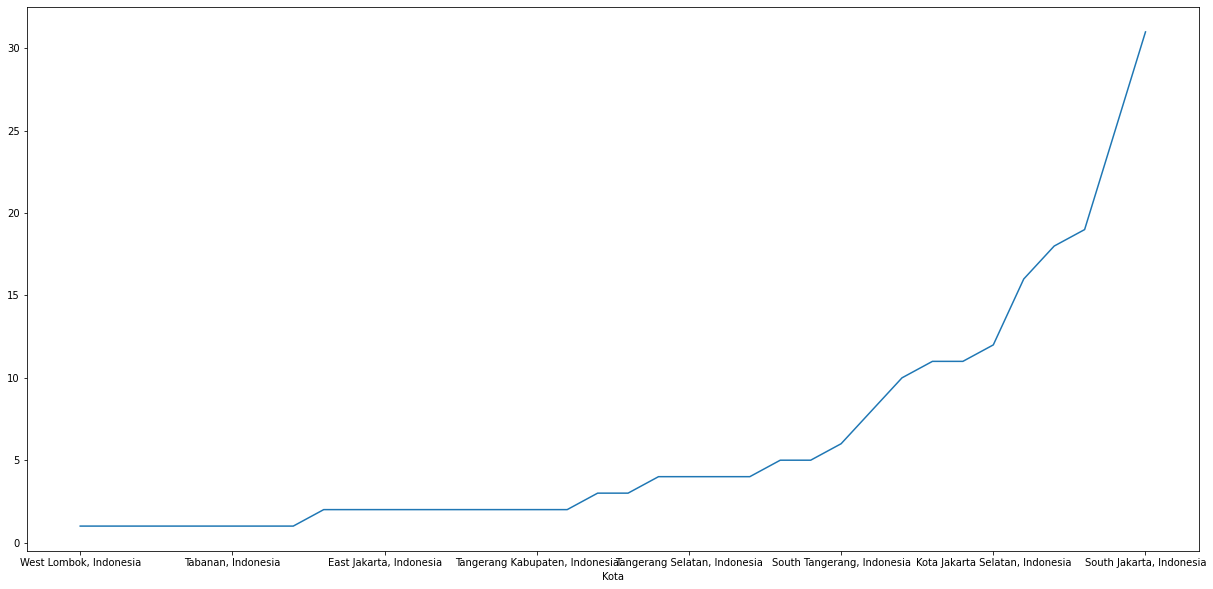

In [70]:
# Create visualisasi plot

job_counts.sort_values(ascending=True).plot(figsize=(21,10));

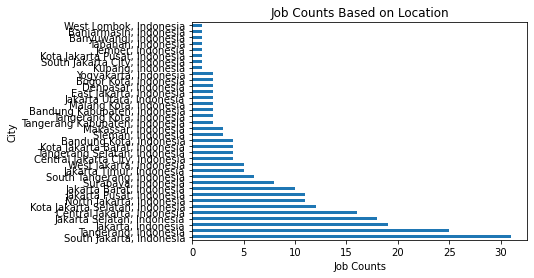

In [71]:
# Creating a visualization with a horizontal bar plot

job_counts.plot(kind='barh')
plt.title('Job Counts Based on Location')
plt.xlabel('Job Counts')
plt.ylabel('City')
plt.show()

In [72]:
South_Jakarta= 31
Central_Jakarta_Indonesia= 22
Tangerang_Indonesia= 20
Jakarta_Selatan_Indonesia= 21
Jakarta_Indonesia= 21

print(Jakarta + Central_Jakarta_Indonesia + Jakarta_Selatan_Indonesia + Central_Jakarta_Indonesia)

NameError: name 'Jakarta' is not defined

In [73]:
card_data = f'{job_counts.mean().round(2)}'

In [58]:
card_data

'6.25'

**INSIGHT**

1. Jakarta and South Jakarta are areas with the highest number of job vacancies among other cities listed on the website. The total number of job vacancies posted for this area reaches 31 vacancies. This indicates that Jakarta and South Jakarta have a high potential labor market, with many companies looking for employees in this area.
2. Jakarta dominates the top 5 cities with the highest number of job vacancies on the website. This shows that Jakarta is the center of business and industry in Indonesia, with many job opportunities available for job seekers.
3. Among the top 5 cities, Tangerang ranks fifth in terms of the highest number of job vacancies outside Jakarta. This insight shows that Tangerang, although not part of Jakarta, still has a significant number of job vacancies on the website. This could be an indication that Tangerang, as a city around Jakarta, also has the potential as an economic and industrial center that offers job opportunities to job seekers.
4. From the top 5 cities, it can be concluded that Jakarta has a total of 93 job vacancies. This insight shows that Jakarta has a significant number of job vacancies on the website, totaling 93 vacancies. This confirms that Jakarta, as a city with a high level of business and industrial activity, is an area with a noticeable number of job vacancies on the website.
5. Based on the data obtained from the first 15 pages taken, the conclusion that can be drawn is that Jakarta is the area that has the most job vacancies on the website. This indicates that Jakarta is a city with an active labor market and offers many job opportunities to job seekers.

In the search for employment, Jakarta and South Jakarta are areas with the highest number of job vacancies on the website, followed by other cities including Tangerang. Therefore, job seekers may consider Jakarta as a potential choice for job hunting, given the high number of job vacancies available in the area.

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.